In [34]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from scipy.stats import norm

In [35]:
# def plot_boxplot_with_means_and_std(data, thetas, alpha):
#     k_values = [1,2,5]  # Assuming all dictionaries have the same keys
#     num_thetas = len(thetas)
# 
#     # Prepare data for boxplot
#     boxplot_data = {k: [[] for _ in range(num_thetas)] for k in k_values}
#     mean_values = {k: [] for k in k_values}
#     std_values = {k: [] for k in k_values}
# 
#     for i, theta in enumerate(thetas):
#         for k in k_values:
#             values = [acc[k] for acc in data[i]]
#             boxplot_data[k][i] = values
#             mean_values[k].append(np.mean(values))
#             std_values[k].append(np.std(values))
# 
#     fig, ax = plt.subplots(figsize=(10, 6))
# 
#     # Plot boxplots
#     for k in k_values:
#         positions = np.arange(num_thetas) * (len(k_values) + 1) + k  # Spread out the boxplots
#         ax.boxplot(boxplot_data[k], positions=positions, widths=0.6)
# 
#     # Plot means and stds
#     for k in k_values:
#         positions = np.arange(num_thetas) * (len(k_values) + 1) + k
#         ax.errorbar(positions, mean_values[k], yerr=std_values[k], fmt='o', label=f'Top-{k} Mean ± Std')
# 
#     ax.set_xlabel('Theta')
#     ax.set_ylabel('Accuracy')
#     ax.set_title(f'Top-k Accuracy for Different Thetas (Alpha = {alpha})')
#     ax.set_xticks(np.arange(num_thetas) * (len(k_values) + 1) + len(k_values) / 2)
#     ax.set_xticklabels(thetas)
#     ax.legend()
#     ax.grid(True)
#     plt.tight_layout()
#     plt.show()
# 
# # Example data (simulated for illustration purposes)
# thetas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# alpha = 0.02
# data = [
#     [{1: np.random.rand(), 2: np.random.rand(), 5: np.random.rand()} for _ in range(100)]
#     for _ in thetas
# ]
# 
# plot_boxplot_with_means_and_std(data, thetas, alpha)


In [36]:
# Function to generate random means
def generate_means(N, mean_load, var_load):
    print('Mean Load:', mean_load, '; Variance Load:', var_load)
    means_load = np.random.normal(loc=mean_load, scale=np.sqrt(var_load), size=N)

    # Plotting means_load
    plt.figure(figsize=(12, 6))
    plt.plot(means_load, marker='o', linestyle='-', color='b', label='means_load')
    plt.title('Random Means for Load')
    plt.xlabel('Node')
    plt.ylabel('Mean Load')
    plt.legend()
    plt.grid(True)

    # Adjust layout
    plt.tight_layout()
    plt.show()

    return means_load


# Function to generate IID data
def generate_iid_data(N, T, means_load):
    loads = np.array([np.random.normal(loc=means_load[i], scale=1, size=T) for i in range(N)])

    return loads, np.mean(loads, axis=1)


# Function to generate AR(1) data
def generate_ar1_data(N, T, means_load, theta):
    """
    Generate AR(1) data for multiple nodes.
    
    Parameters:
        N (int): Number of nodes.
        T (int): Number of time steps.
        means_load (array-like): Mean load for each node.
        theta (float): AR(1) process parameter.
    
    Returns:
        load (ndarray): Generated AR(1) load data.
    """
    # print('Theta:', theta)
    loads = np.zeros((N, T))

    def generate_ar1(theta, T, mean_node):
        """
        Generate a single AR(1) time series.
        
        Parameters:
            theta (float): AR(1) process parameter.
            n (int): Number of time steps.
            mean_node (float): Mean load for the node.
        
        Returns:
            ar1 (ndarray): Generated AR(1) time series.
        """
        ar1 = np.zeros(T)
        ar1[0] = mean_node
        for t in range(1, T):
            ar1[t] = theta * ar1[t - 1] + (1 - theta) * mean_node + np.random.normal(0, 1)
        return ar1

    for i in range(N):
        loads[i] = generate_ar1(theta, T, means_load[i])

    return loads, np.mean(loads, axis=1)

Mean Load: 15 ; Variance Load: 10


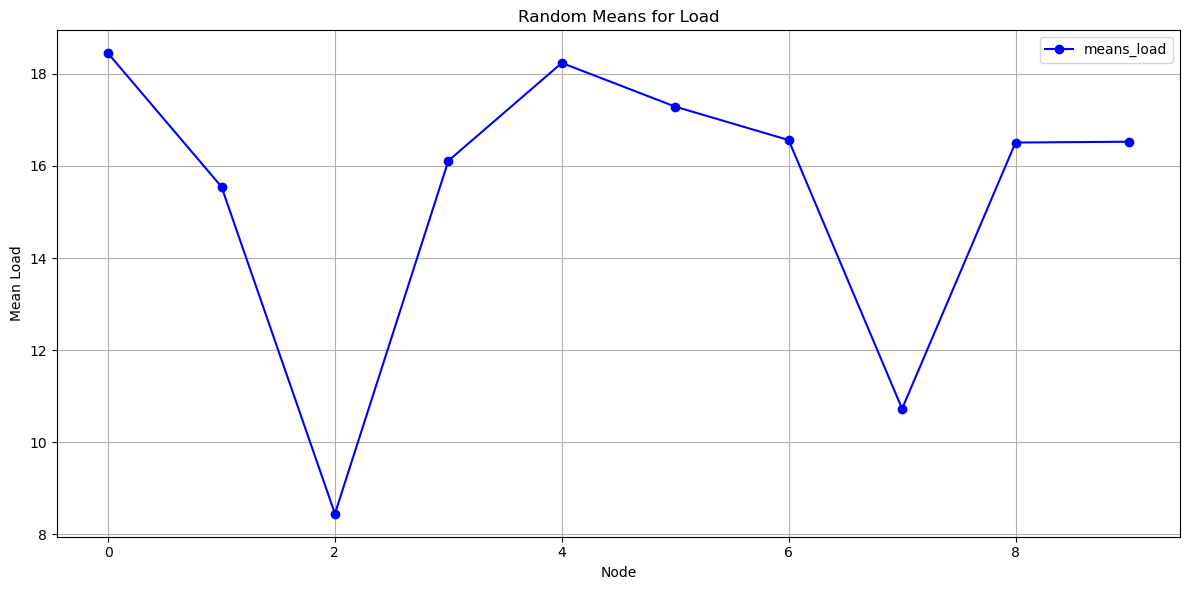

In [37]:
N = 10
T = 1000
mean_load = 15
var_load = 10
thetas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
alphas = [2, 0.2, 0.02, 0.01, 0.008, 0.005, 0.002, 0.001]
k_values = [1, 2, 5]

means_load = generate_means(N, mean_load, var_load)

# Generate AR(1) data
# load_ar1, load_ar1_means = generate_ar1_data(N, T, means_load, theta)
load_ar1_thetas = []
load_ar1_means_thetas = []
for theta in thetas:
    load_ar1_theta, load_ar1_means_theta = generate_ar1_data(N, T, means_load, theta)
    load_ar1_thetas.append(load_ar1_theta)
    load_ar1_means_thetas.append(load_ar1_means_theta)

In [38]:
load_ar1_thetas
load_ar1_means_thetas

[array([18.49130744, 15.52823209,  8.46179672, 16.15225023, 18.2147304 ,
        17.24054817, 16.58166857, 10.72450097, 16.53788342, 16.58100753]),
 array([18.43992664, 15.51055093,  8.43685184, 16.06688854, 18.20416993,
        17.25658724, 16.52687301, 10.77164009, 16.55437455, 16.55564757]),
 array([18.49773836, 15.62061572,  8.41363096, 16.15290463, 18.17173549,
        17.35989822, 16.55935946, 10.73724943, 16.51260755, 16.53077134]),
 array([18.48294489, 15.55170152,  8.54540036, 16.14602696, 18.22771492,
        17.34943837, 16.55524522, 10.68838968, 16.50970573, 16.60794948]),
 array([18.49012077, 15.58439524,  8.49785806, 16.08145667, 18.26310941,
        17.42569323, 16.62861994, 10.73040002, 16.54617601, 16.52149827]),
 array([18.38572599, 15.59879041,  8.34282427, 16.18449795, 18.1807099 ,
        17.22862981, 16.55853875, 10.78308212, 16.58044129, 16.40649521]),
 array([18.45128105, 15.65552744,  8.50656906, 16.07602009, 18.2866758 ,
        17.2632543 , 16.68988222, 10.71

In [39]:
def plot_combined(data, title):
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    time = np.arange(data.shape[1])

    # Plot distributions (left subplot)
    for i in range(data.shape[0]):
        mean = np.mean(data[i])
        std = np.std(data[i])
        x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
        p = norm.pdf(x, mean, std)
        axs[0].plot(x, p, label=f'Node {i + 1}')
    axs[0].set_title(f'{title} - Distribution')
    axs[0].set_xlabel('Value')
    axs[0].set_ylabel('Density')
    axs[0].legend()
    axs[0].grid(True)

    def exponential_moving_average(data, alpha):
        ema = np.zeros_like(data)
        ema[0] = data[0]
        for t in range(1, len(data)):
            ema[t] = alpha * data[t] + (1 - alpha) * ema[t - 1]
        return ema

    # Plot smoothed time series (right subplot)
    for i in range(data.shape[0]):
        smoothed_data = savgol_filter(data[i], window_length=51, polyorder=3)
        axs[1].plot(time, smoothed_data, label=f'Node {i + 1}')
    axs[1].set_title(f'{title} - Time Series')
    axs[1].set_xlabel('Time (T)')
    axs[1].set_ylabel('Value')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    fig.savefig(f'image/{title}.png')
    plt.show()

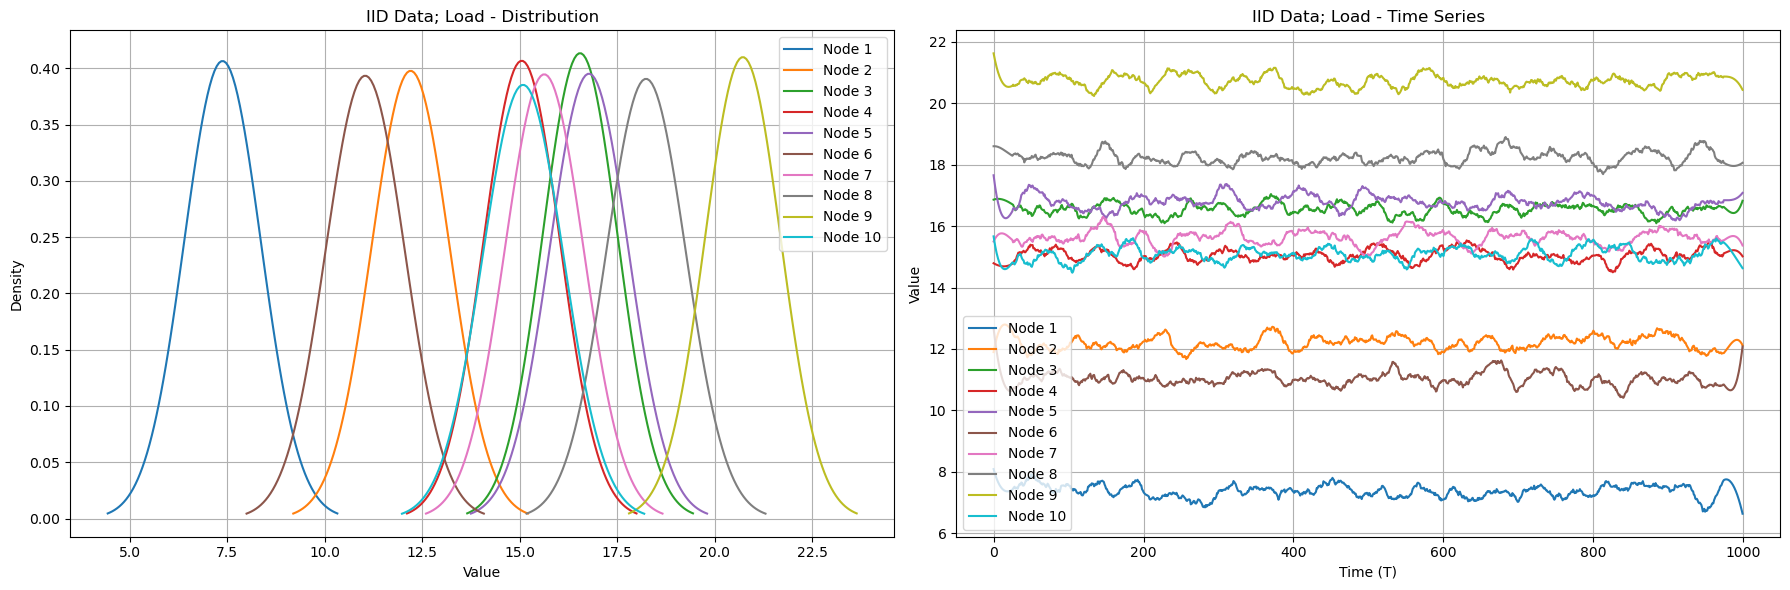

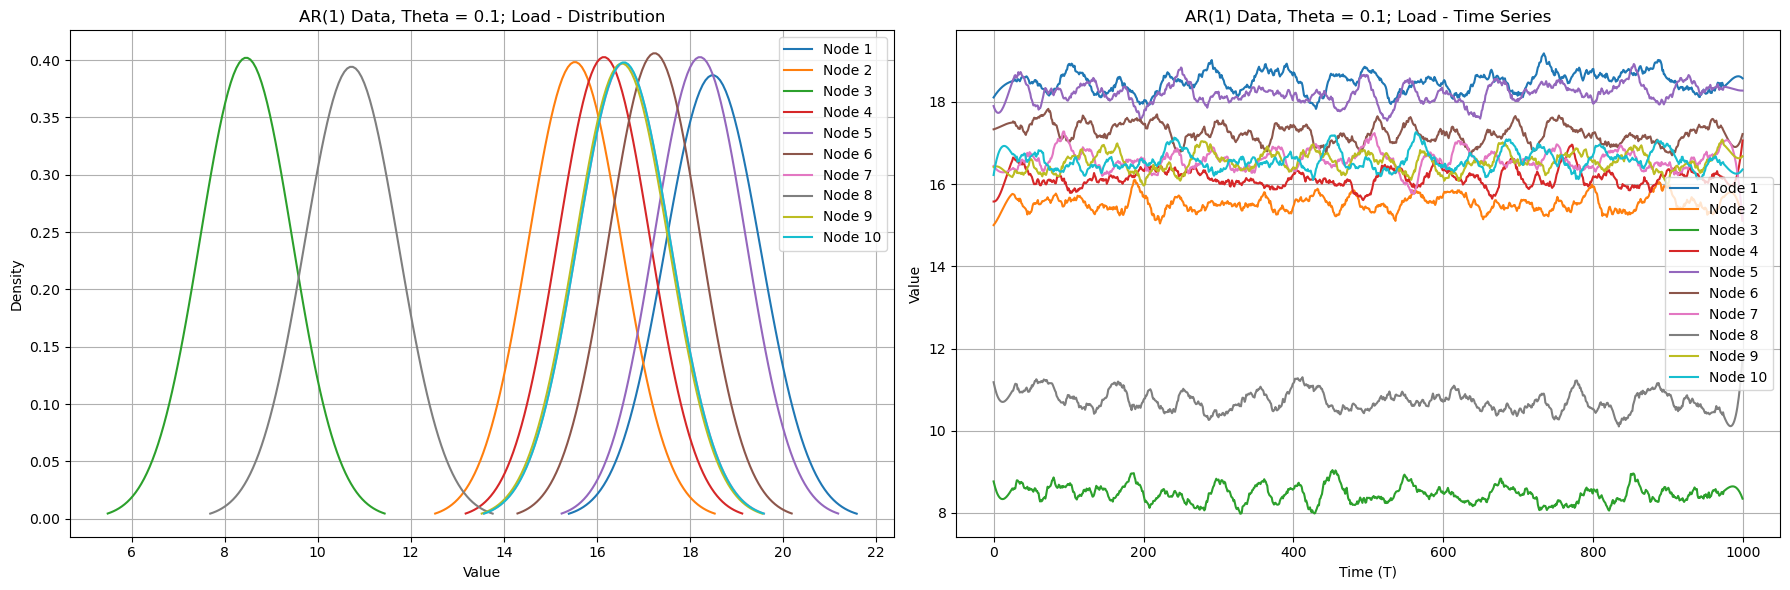

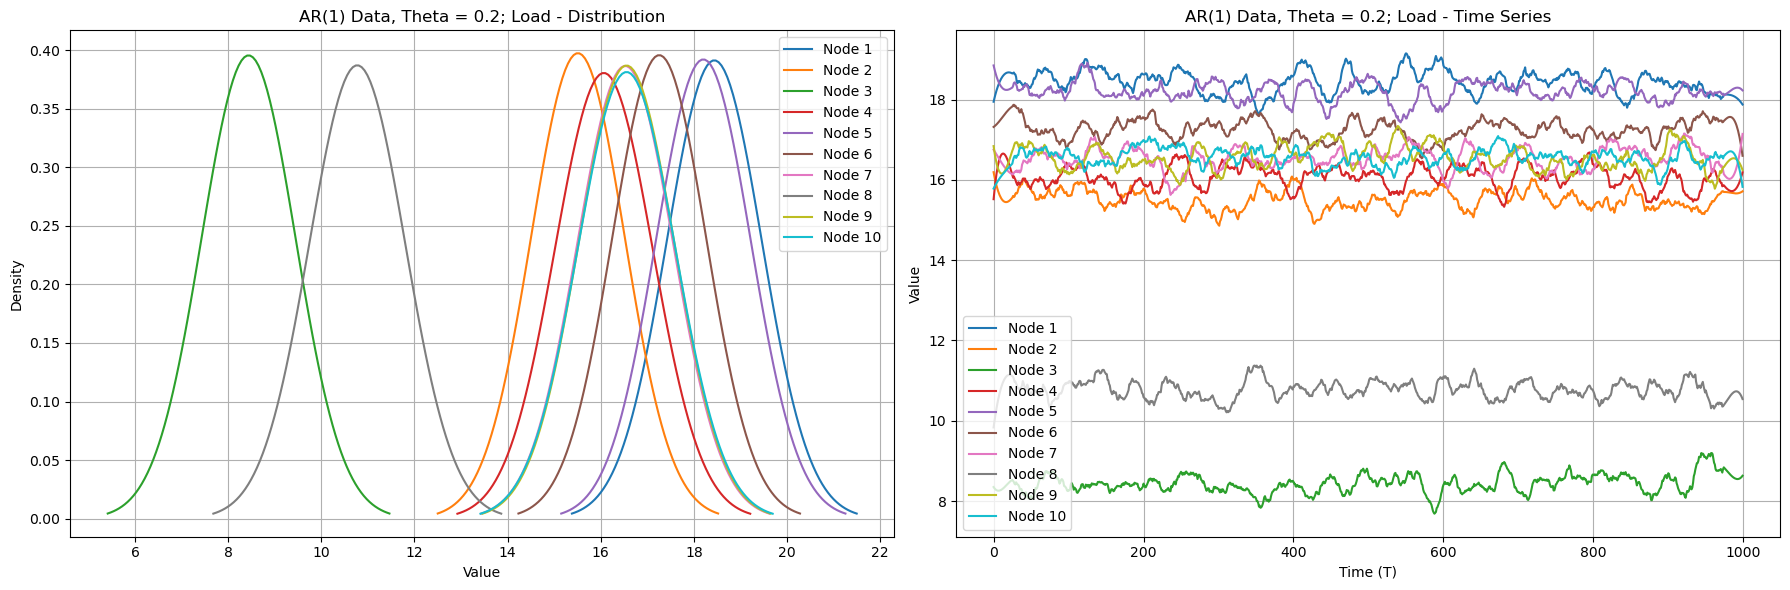

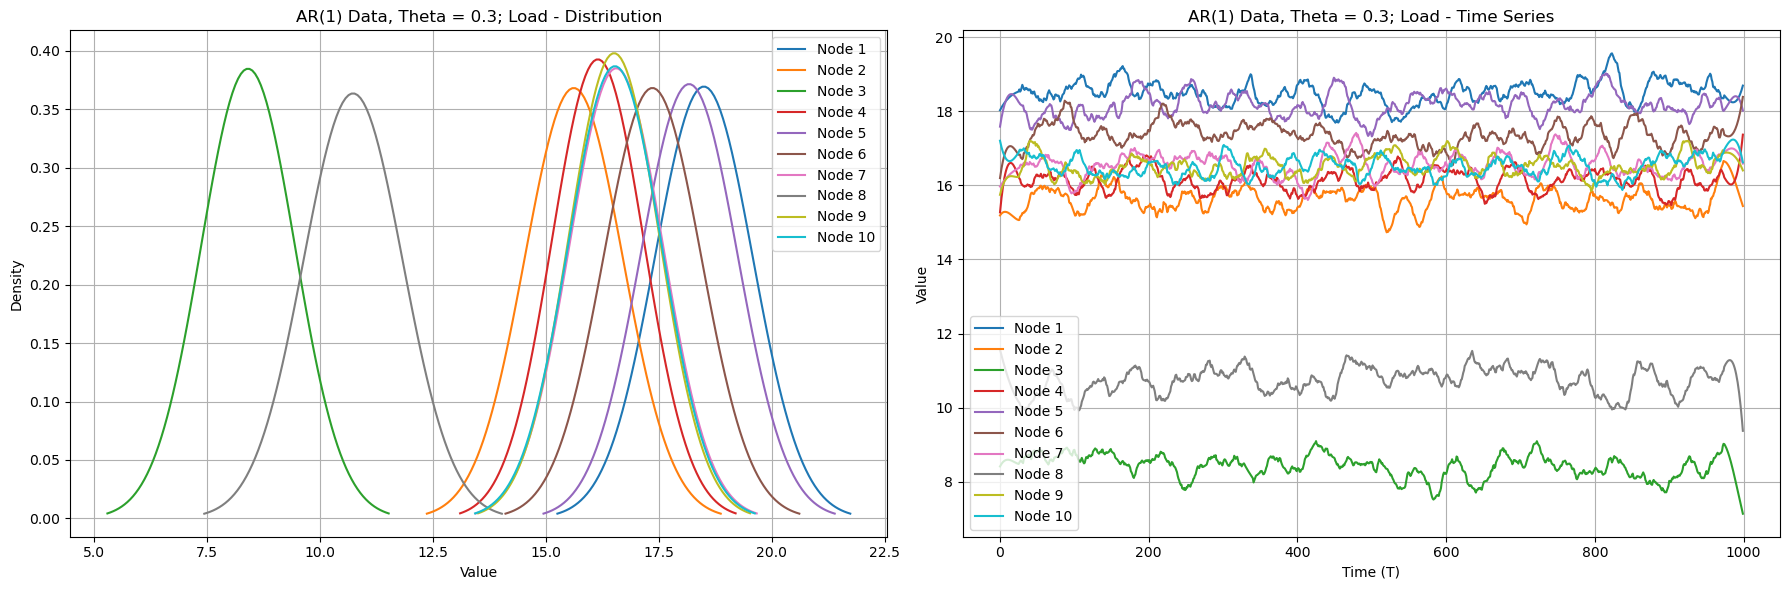

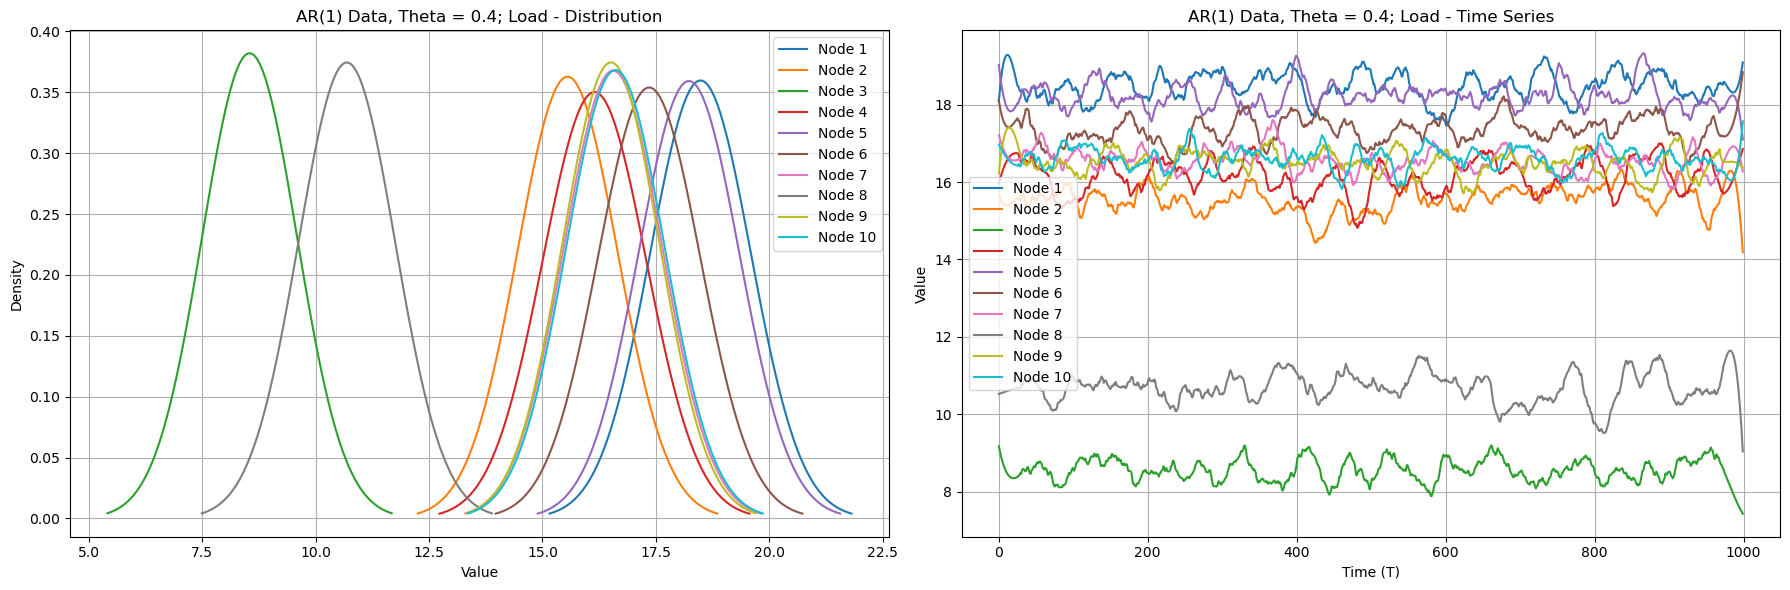

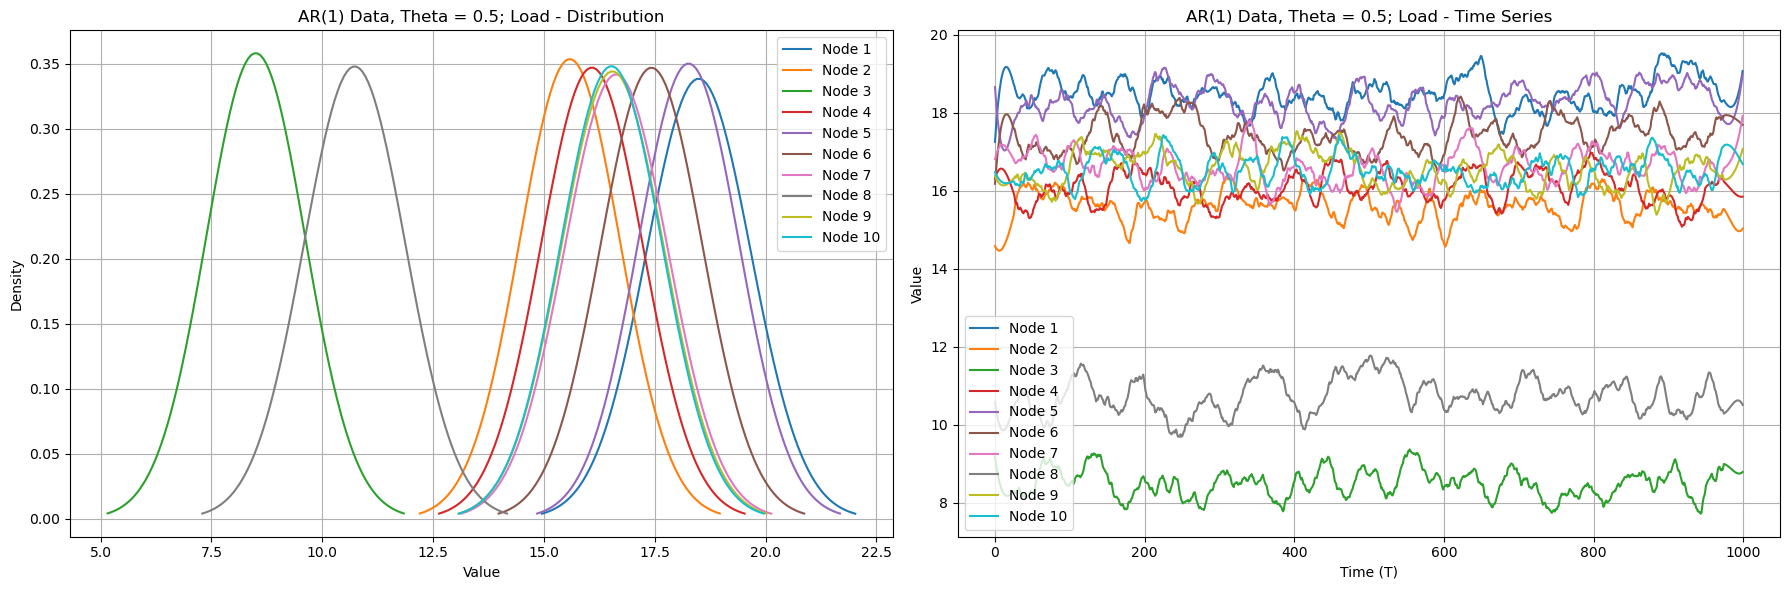

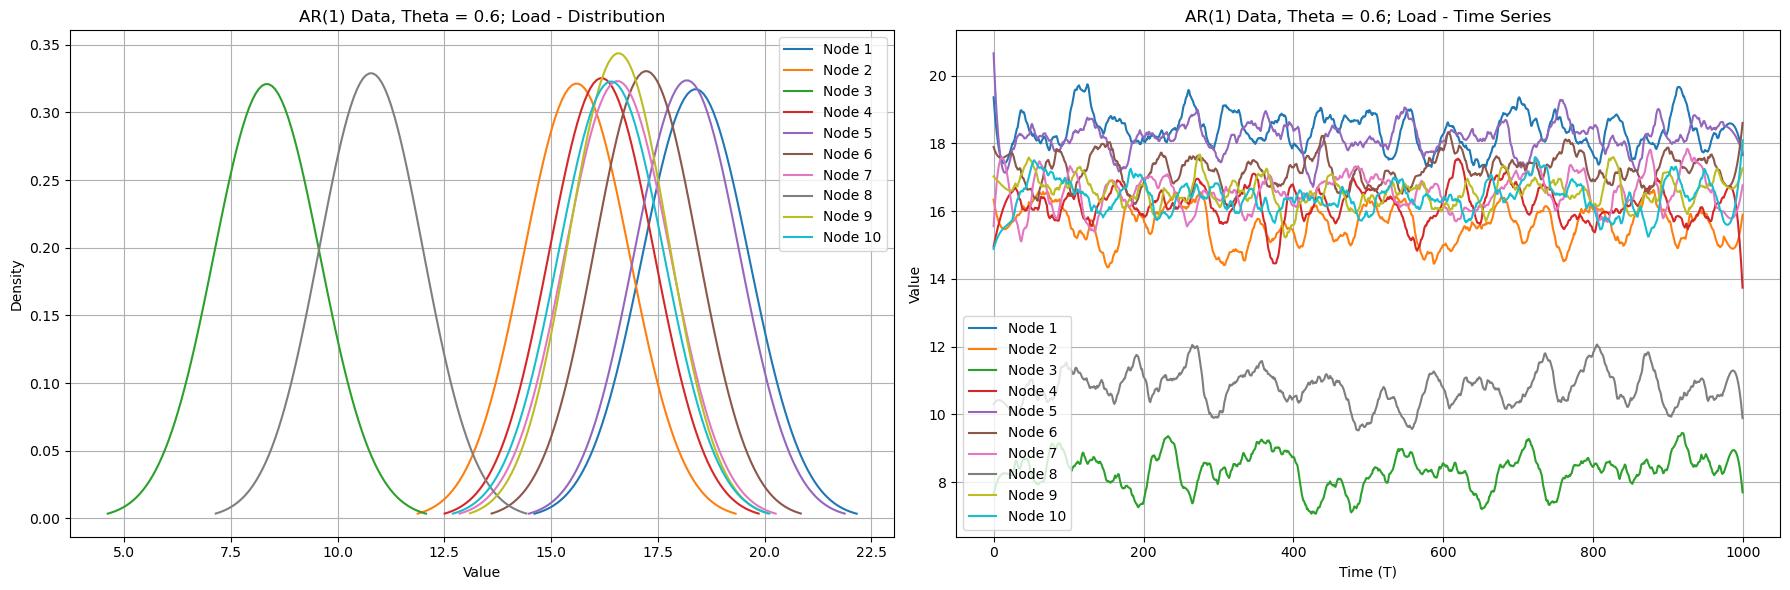

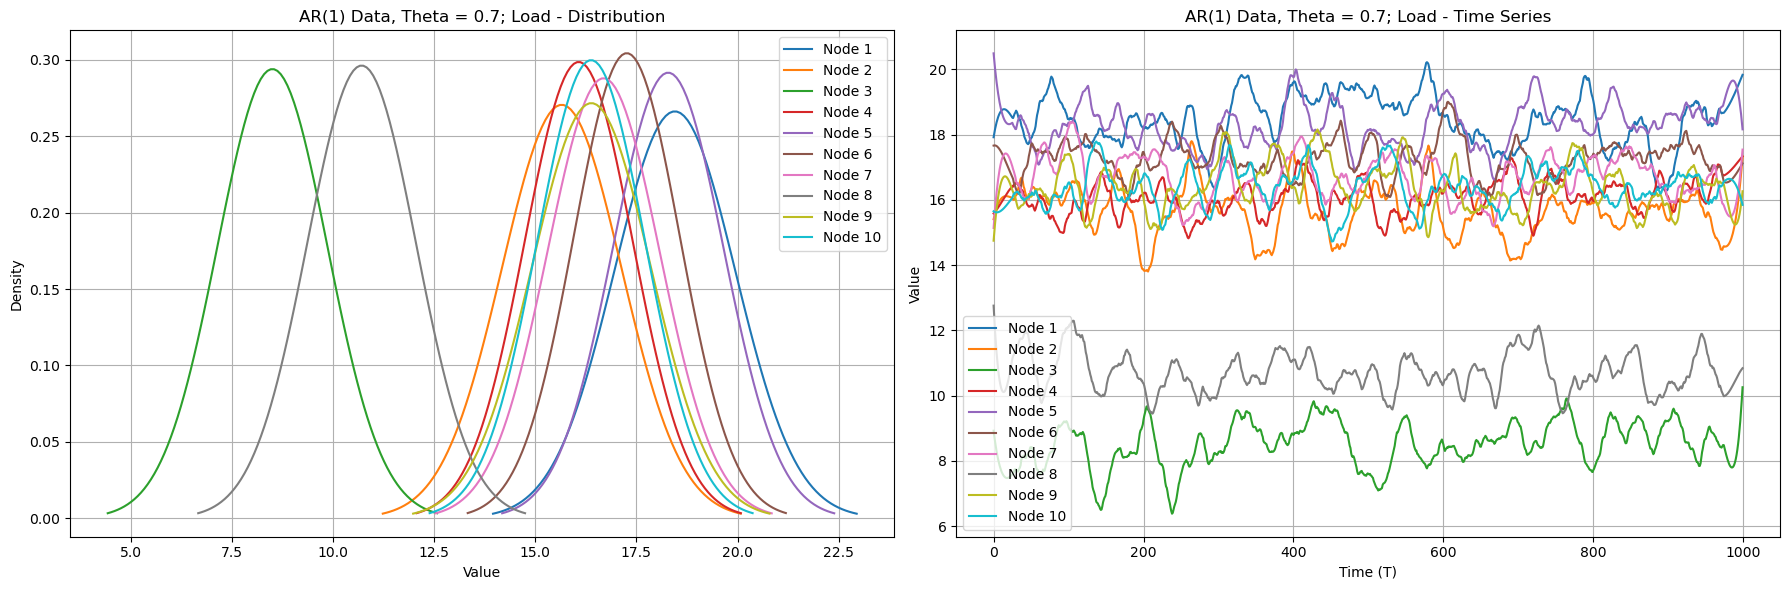

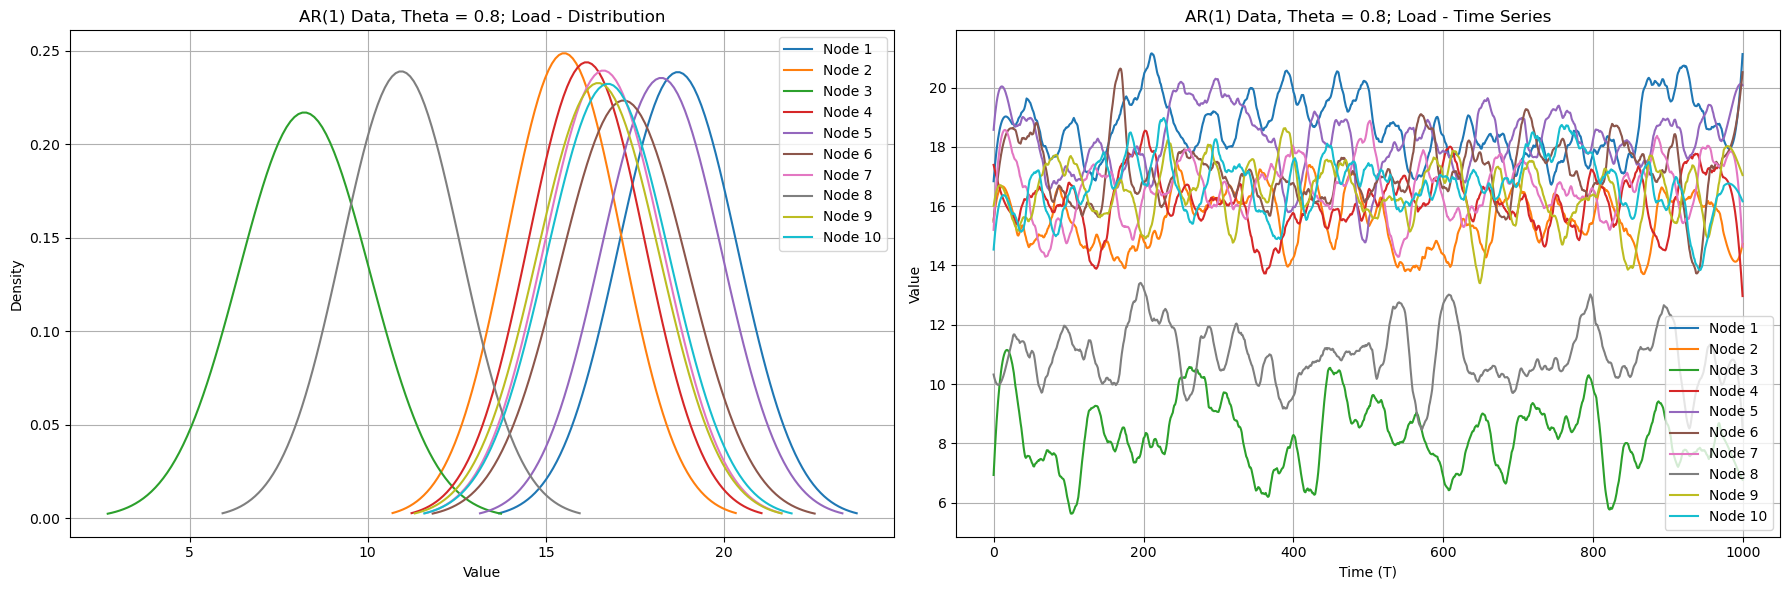

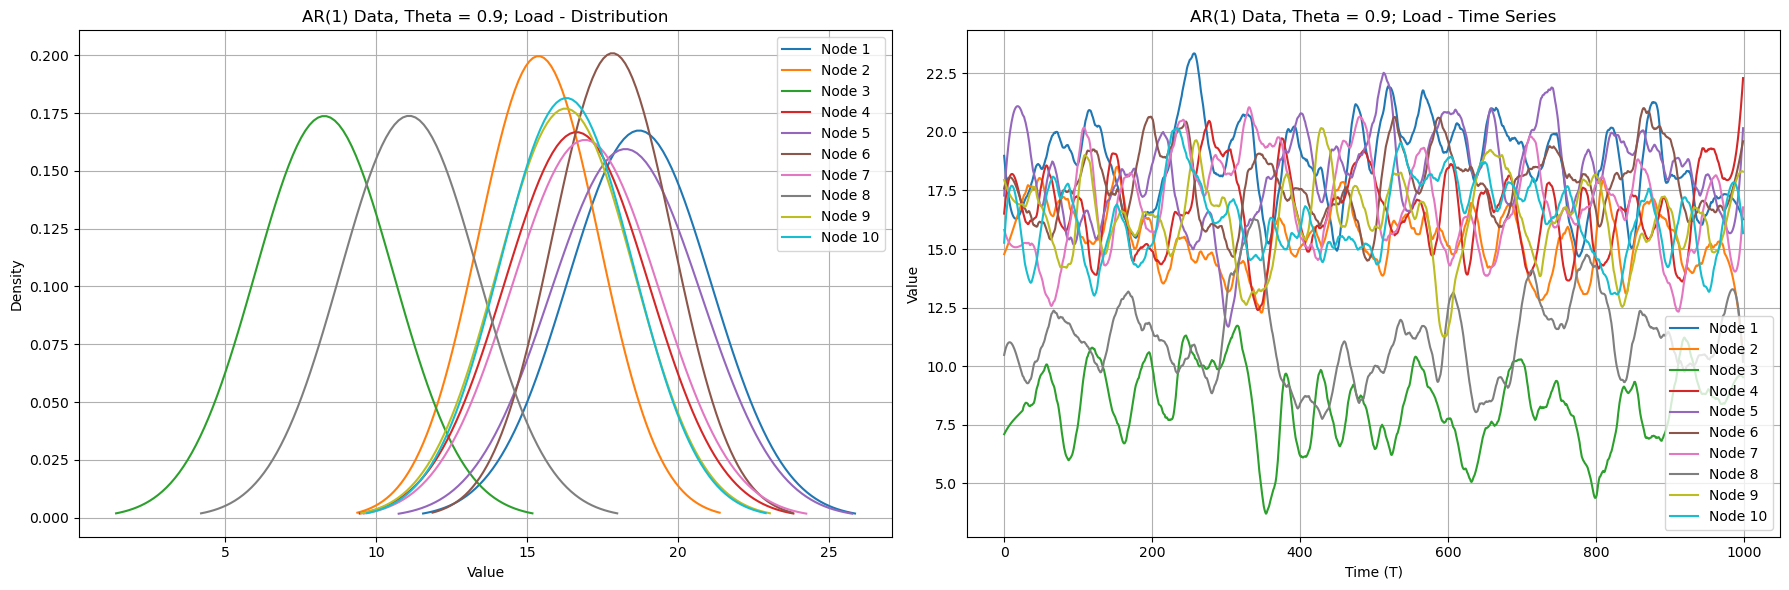

In [40]:
plot_combined(load_iid, 'IID Data; Load')
for i, theta in enumerate(thetas):
    plot_combined(load_ar1_thetas[i], f'AR(1) Data, Theta = {theta}; Load')

In [41]:
def calculate_top_k_accuracy(actions, load_means, k):
    optimal_actions = np.argsort(load_means)[:k]
    accuracies = np.zeros(T)

    for t in range(T):
        if actions[t] in optimal_actions:
            accuracies[t] = 1

    top_k_accuracy = accuracies.sum() / T

    return top_k_accuracy

In [42]:
def ucb(loads, loads_means, alpha):
    N = len(loads)
    T = len(loads[0])

    optimal_mean_load = np.min(loads_means)
    optimal_reward = 1 / (1 + optimal_mean_load)

    # print('Optimal Mean Load:', optimal_mean_load, '; Optimal Reward:', optimal_reward)

    rewards = np.zeros(N)
    counts = np.zeros(N)
    ucbs = np.zeros(N)
    regrets = []
    actions = []

    for t in range(T):
        # print('T:', t)
        for i in range(N):
            if counts[i] == 0:
                ucbs[i] = np.inf
            else:
                ucbs[i] = rewards[i] + np.sqrt(alpha * np.log(t + 1) / counts[i])
                # print('i:', i, '; UCB:', ucbs[i], '= rewards:', rewards[i], '+', np.sqrt(2 * np.log(t + 1) / counts[i]))

        action = np.argmax(ucbs)

        load = loads[action][t]
        reward = 1 / (1 + load)
        # print('T:', t, '; Action:', action, '; load:', load, '; Reward:', reward)
        # print('ucbs:', ucbs)
        # print('rewards:', rewards)

        counts[action] += 1
        n = counts[action]
        value = rewards[action]
        rewards[action] = ((n - 1) / n) * value + (1 / n) * reward

        regret = optimal_reward - reward
        regrets.append(regret)
        actions.append(action)

    accuracies = {k: calculate_top_k_accuracy(actions, loads_means, k) for k in k_values}

    return regrets, actions, accuracies

In [45]:
# find the convergence step
def find_convergence_step(smoothed_regrets, threshold=0.01):
    for i in range(1, len(smoothed_regrets)):
        if abs(smoothed_regrets[i] - smoothed_regrets[i-1]) < threshold:
            return i
    return len(smoothed_regrets)  # if no convergence point is found, return the maximum number of steps

In [43]:
def plot_ucb_combined_results(regrets, actions, accuracies, k_values, alpha, savename='UCB Results', threshold=0.01, theta=None):
    fig, axs = plt.subplots(2, 2, figsize=(18, 12))

    # Plot smoothed single-step regrets
    smoothed_single_step_regrets = savgol_filter(regrets, window_length=51, polyorder=3)
    axs[0, 0].plot(smoothed_single_step_regrets)
    axs[0, 0].set_xlabel('Time Steps')
    axs[0, 0].set_ylabel('Smoothed Single-Step Regret')
    axs[0, 0].set_title('Single-Step Regret')
    axs[0, 0].grid(True)

    # Plot smoothed cumulative regrets
    smoothed_cumulative_regrets = savgol_filter(np.cumsum(regrets), window_length=51, polyorder=3)
    convergence_step = find_convergence_step(smoothed_cumulative_regrets, threshold)
    axs[0, 1].plot(smoothed_cumulative_regrets)
    axs[0, 1].axvline(convergence_step, color='red', linestyle='--', label=f'Convergence Step: {convergence_step}')
    axs[0, 1].text(convergence_step, smoothed_cumulative_regrets[convergence_step-1], f'{convergence_step}', color='red',
                   verticalalignment='bottom', horizontalalignment='right')
    axs[0, 1].set_xlabel('Time Steps')
    axs[0, 1].set_ylabel('Smoothed Cumulative Regret')
    axs[0, 1].set_title('Smoothed Cumulative Regret')
    axs[0, 1].grid(True)

    # Plot top-k accuracy
    width = 0.15
    x = np.arange(len(k_values))
    top_k_accuracies = [accuracies[k] for k in k_values]
    axs[1, 0].bar(x, top_k_accuracies, width)
    axs[1, 0].set_xticks(x)
    axs[1, 0].set_xticklabels(k_values)
    axs[1, 0].set_xlabel('Top-k')
    axs[1, 0].set_ylabel('Accuracy')
    axs[1, 0].set_title('Top-k Accuracy')
    axs[1, 0].grid(True)

    # Plot actions
    time = np.arange(len(actions))
    axs[1, 1].plot(time, actions)
    axs[1, 1].axvline(convergence_step, linestyle='--', color='red')
    axs[1, 1].set_title('Action Plot')
    axs[1, 1].set_xlabel('Time (T)')
    axs[1, 1].set_ylabel('Node')
    axs[1, 1].grid(True)

    fig.suptitle(savename, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.savefig(f'image/{savename}.png')
    plt.show()

    print(f'theta: {theta: <3} | alpha: {alpha: <5} | Convergence step: {convergence_step: <4} | top-1: {accuracies[1]: <5} | top-2: {accuracies[2]: <5} | top-5: {accuracies[5]: <5}')
    return convergence_step

In [48]:
for i, theta in enumerate(thetas):
    for alpha in alphas:
        ar1_ucb_regrets, ar1_ucb_actions, ar1_ucb_accuracies = ucb(load_ar1_thetas[i], load_ar1_means_thetas[i], alpha)
        # ar1_ucb_convergence_steps = plot_ucb_combined_results(ar1_ucb_regrets, ar1_ucb_actions, ar1_ucb_accuracies, k_values, alpha, f'AR(1) Data, Theta = {theta}; UCB Algorithm (Alpha = {alpha})', 0.005, theta)
        print(f'theta: {theta: <3} | alpha: {alpha: <5} | top-1: {ar1_ucb_accuracies[1]: <5} | top-2: {ar1_ucb_accuracies[2]: <5} | top-5: {ar1_ucb_accuracies[5]: <5}')


theta: 0.1 | alpha: 2     | top-1: 0.126 | top-2: 0.238 | top-5: 0.528
theta: 0.1 | alpha: 0.2   | top-1: 0.213 | top-2: 0.35  | top-5: 0.604
theta: 0.1 | alpha: 0.02  | top-1: 0.642 | top-2: 0.743 | top-5: 0.848
theta: 0.1 | alpha: 0.01  | top-1: 0.772 | top-2: 0.841 | top-5: 0.907
theta: 0.1 | alpha: 0.008 | top-1: 0.801 | top-2: 0.868 | top-5: 0.924
theta: 0.1 | alpha: 0.005 | top-1: 0.868 | top-2: 0.912 | top-5: 0.948
theta: 0.1 | alpha: 0.002 | top-1: 0.938 | top-2: 0.959 | top-5: 0.977
theta: 0.1 | alpha: 0.001 | top-1: 0.964 | top-2: 0.976 | top-5: 0.985
theta: 0.2 | alpha: 2     | top-1: 0.127 | top-2: 0.239 | top-5: 0.529
theta: 0.2 | alpha: 0.2   | top-1: 0.216 | top-2: 0.352 | top-5: 0.606
theta: 0.2 | alpha: 0.02  | top-1: 0.633 | top-2: 0.743 | top-5: 0.847
theta: 0.2 | alpha: 0.01  | top-1: 0.779 | top-2: 0.845 | top-5: 0.909
theta: 0.2 | alpha: 0.008 | top-1: 0.811 | top-2: 0.871 | top-5: 0.925
theta: 0.2 | alpha: 0.005 | top-1: 0.868 | top-2: 0.914 | top-5: 0.949
theta:

In [ ]:
R = 100

N = 10
T = 1000
mean_load = 15
var_load = 10
thetas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
alphas = [2, 0.2, 0.02, 0.01, 0.008, 0.005, 0.002, 0.001]
k_values = [1, 2, 5]

means_load = generate_means(N, mean_load, var_load)

# Generate AR(1) data
# load_ar1, load_ar1_means = generate_ar1_data(N, T, means_load, theta)
load_ar1_thetas = []
load_ar1_means_thetas = []
for theta in thetas:
    load_ar1_theta, load_ar1_means_theta = generate_ar1_data(N, T, means_load, theta)
    load_ar1_thetas.append(load_ar1_theta)
    load_ar1_means_thetas.append(load_ar1_means_theta)

In [25]:
R = 100
thetas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
alphas = [0.2, 0.02, 0.01, 0.008, 0.005, 0.002, 0.001]

In [50]:
theta_ave_accuracies = []
for theta in thetas:
    
    alpha_ave_accuracies = []
    for alpha in alphas:
        
        ave_accuracies = []
        
        for i in range(R):
            regrets, actions, accuracies = ucb(load_ar1_thetas[thetas.index(theta)], load_ar1_means_thetas[thetas.index(theta)], alpha)
            print(f'theta: {theta: <3} | alpha: {alpha: <5} | i: {i} top-1: {accuracies[1]: <5} | top-2: {accuracies[2]: <5} | top-5: {accuracies[5]: <5}')
            ave_accuracies.append(accuracies)

        alpha_ave_accuracies.append(ave_accuracies)
    
    theta_ave_accuracies.append(alpha_ave_accuracies)

theta: 0.1 | alpha: 2     | i: 0 top-1: 0.126 | top-2: 0.238 | top-5: 0.528
theta: 0.1 | alpha: 2     | i: 1 top-1: 0.126 | top-2: 0.238 | top-5: 0.528
theta: 0.1 | alpha: 2     | i: 2 top-1: 0.126 | top-2: 0.238 | top-5: 0.528
theta: 0.1 | alpha: 2     | i: 3 top-1: 0.126 | top-2: 0.238 | top-5: 0.528
theta: 0.1 | alpha: 2     | i: 4 top-1: 0.126 | top-2: 0.238 | top-5: 0.528
theta: 0.1 | alpha: 2     | i: 5 top-1: 0.126 | top-2: 0.238 | top-5: 0.528
theta: 0.1 | alpha: 2     | i: 6 top-1: 0.126 | top-2: 0.238 | top-5: 0.528
theta: 0.1 | alpha: 2     | i: 7 top-1: 0.126 | top-2: 0.238 | top-5: 0.528
theta: 0.1 | alpha: 2     | i: 8 top-1: 0.126 | top-2: 0.238 | top-5: 0.528
theta: 0.1 | alpha: 2     | i: 9 top-1: 0.126 | top-2: 0.238 | top-5: 0.528
theta: 0.1 | alpha: 2     | i: 10 top-1: 0.126 | top-2: 0.238 | top-5: 0.528
theta: 0.1 | alpha: 2     | i: 11 top-1: 0.126 | top-2: 0.238 | top-5: 0.528
theta: 0.1 | alpha: 2     | i: 12 top-1: 0.126 | top-2: 0.238 | top-5: 0.528
theta: 0.

KeyboardInterrupt: 

In [27]:
def plot_from_accuracies(thetas, alphas, theta_ave_accuracies):
    for alpha_idx, alpha in enumerate(alphas):
        fig, ax = plt.subplots(figsize=(10, 6))
        mean_accuracies = {k: [] for k in [1, 2, 5]}
        std_accuracies = {k: [] for k in [1, 2, 5]}

        for theta_idx, theta in enumerate(thetas):
            ave_accuracies = theta_ave_accuracies[theta_idx][alpha_idx]
            for k in [1, 2, 5]:
                k_accuracies = [acc[k] for acc in ave_accuracies]
                mean_accuracies[k].append(np.mean(k_accuracies))
                std_accuracies[k].append(np.std(k_accuracies))

        # 绘制均值和标准差的线条
        for k in [1, 2, 5]:
            ax.errorbar(thetas, mean_accuracies[k], yerr=std_accuracies[k], fmt='-o', capsize=5, label=f'Top-{k} Accuracy')

        # 设置标签和标题
        ax.set_xlabel('Theta')
        ax.set_ylabel('Top-k Accuracy')
        ax.set_title(f'Top-k Accuracy vs Theta (Alpha = {alpha})')
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()

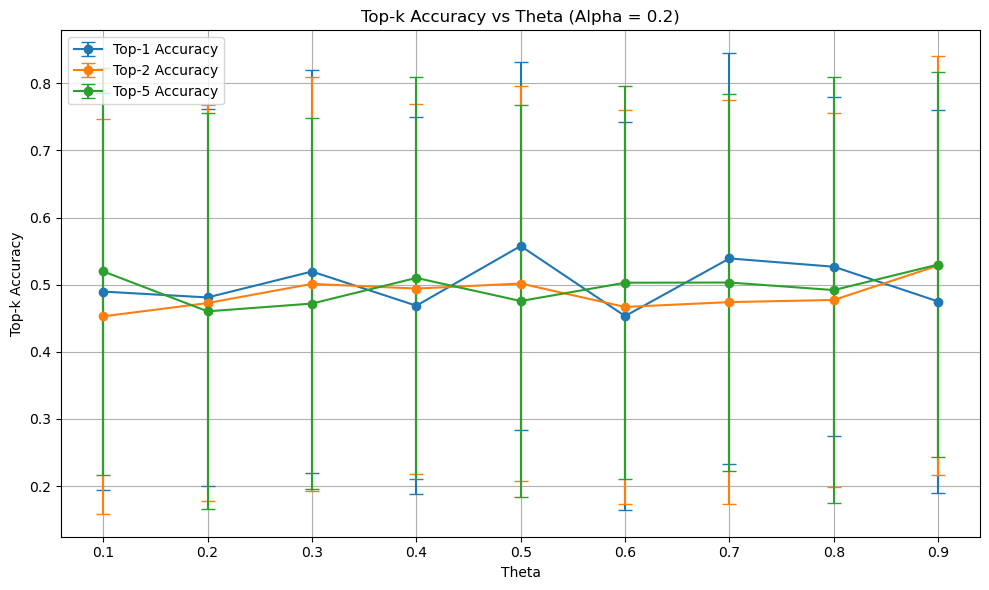

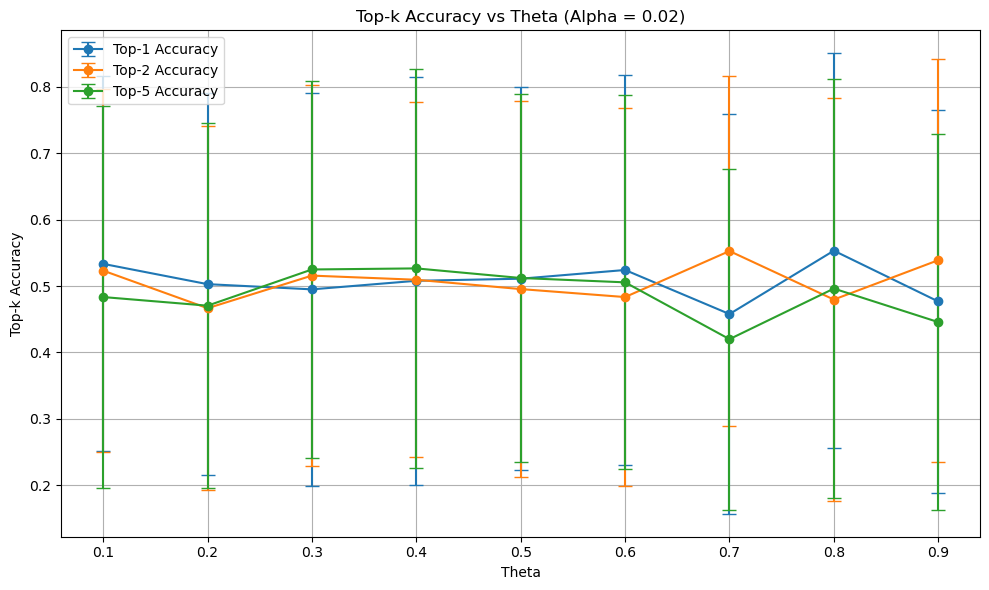

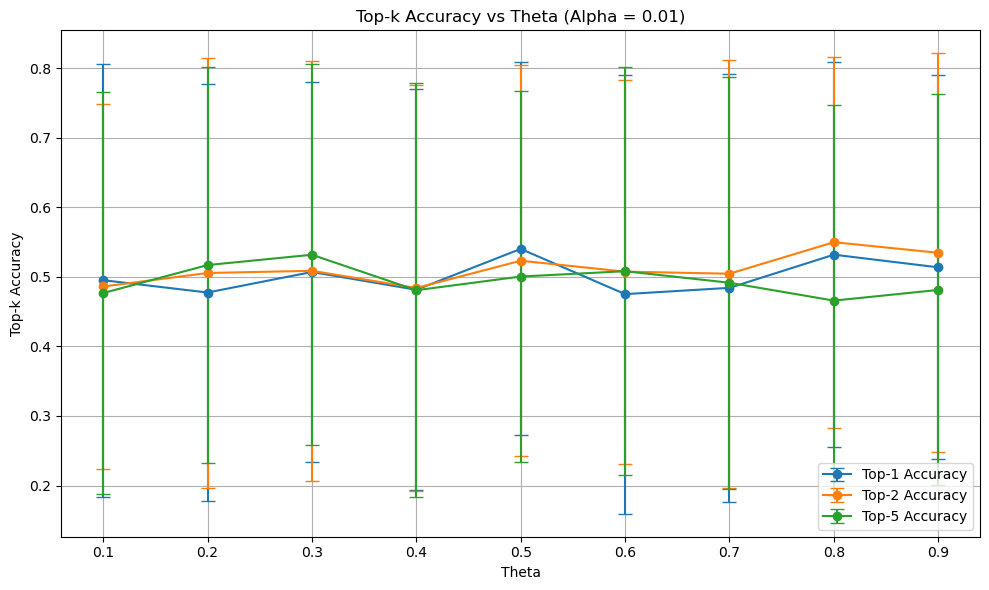

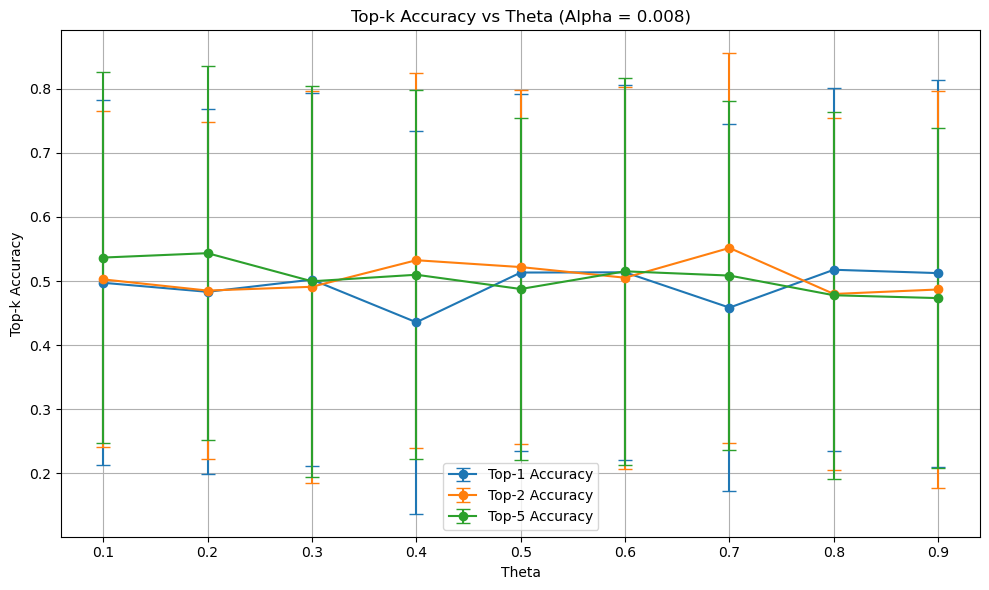

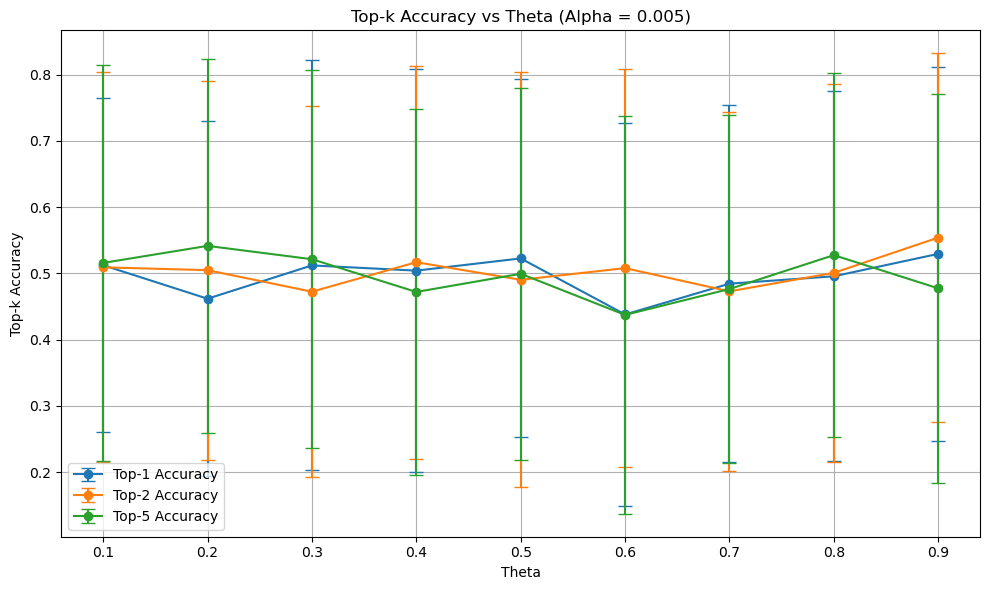

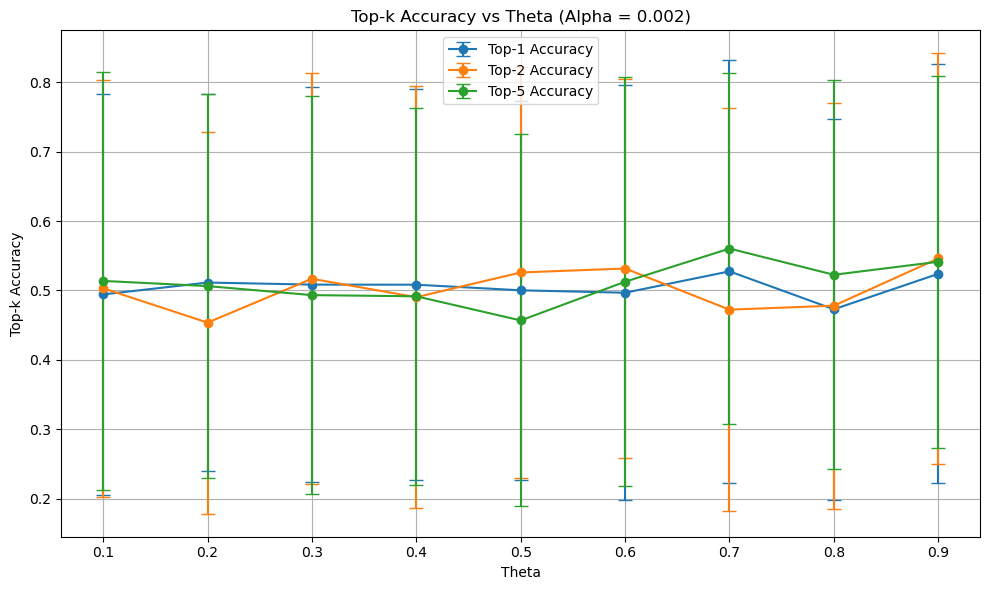

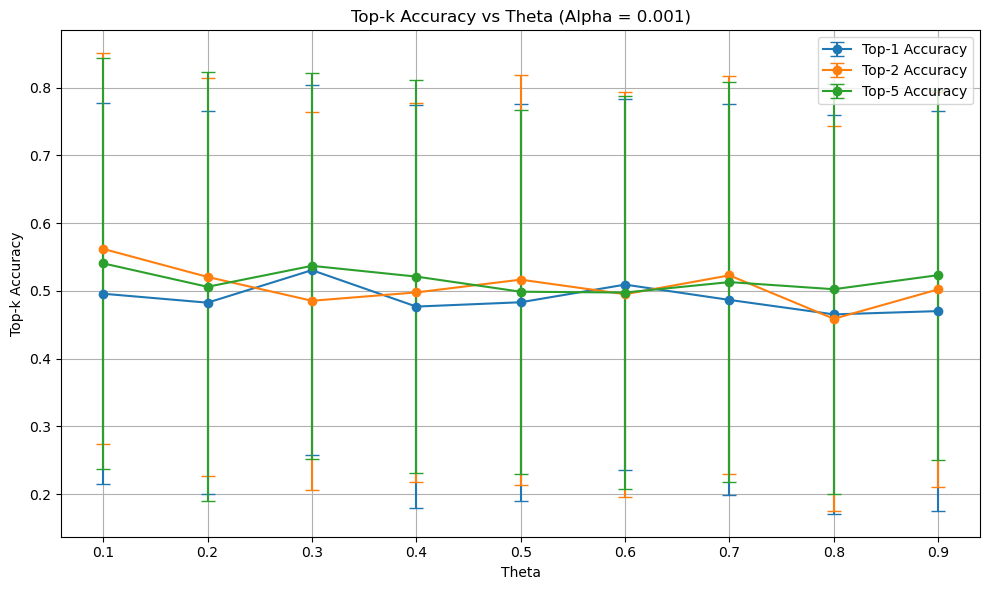

In [28]:
plot_from_accuracies(thetas, alphas, theta_ave_accuracies)

In [29]:
def plot_boxplots(thetas, alphas, theta_ave_accuracies):
    for alpha_idx, alpha in enumerate(alphas):
        fig, ax = plt.subplots(figsize=(10, 6))
        boxplot_data = {k: [[] for _ in range(len(thetas))] for k in [1, 2, 5]}

        for theta_idx, theta in enumerate(thetas):
            ave_accuracies = theta_ave_accuracies[theta_idx][alpha_idx]
            for k in [1, 2, 5]:
                k_accuracies = [acc[k] for acc in ave_accuracies]
                boxplot_data[k][theta_idx] = k_accuracies

        # 绘制箱线图
        for k, data in boxplot_data.items():
            positions = np.arange(len(thetas)) * (len(boxplot_data) + 1) + list(boxplot_data.keys()).index(k)
            ax.boxplot(data, positions=positions, widths=0.6, patch_artist=True, labels=[f'Theta {theta}' for theta in thetas])

        # 设置标签和标题
        ax.set_xlabel('Theta')
        ax.set_ylabel('Top-k Accuracy')
        ax.set_title(f'Top-k Accuracy vs Theta (Alpha = {alpha})')
        ax.set_xticks(np.arange(len(thetas)) * (len(boxplot_data) + 1))
        ax.set_xticklabels(thetas)
        ax.legend([f'Top-{k} Accuracy' for k in [1, 2, 5]])
        ax.grid(True)

        plt.tight_layout()
        plt.show()

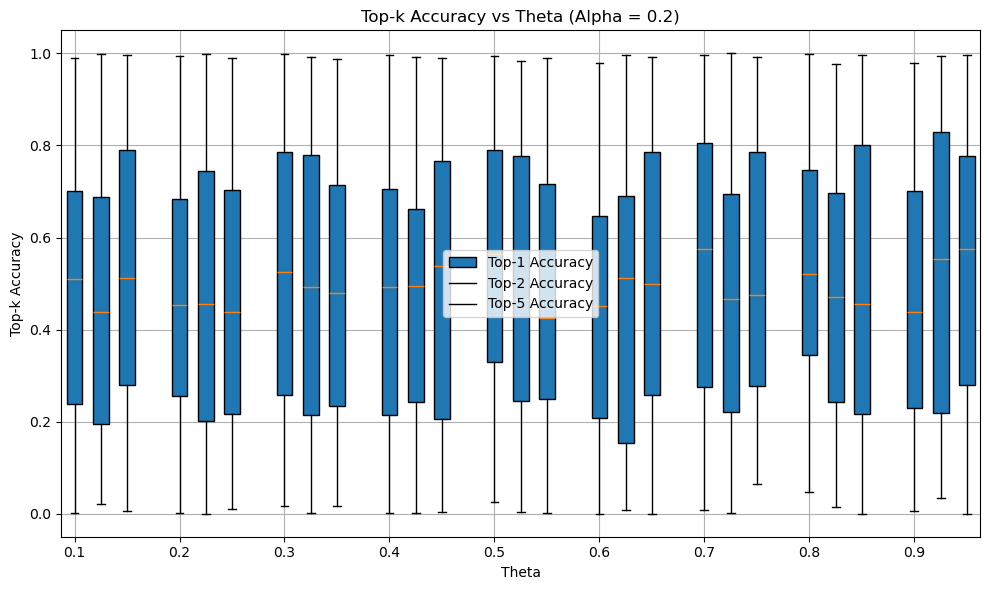

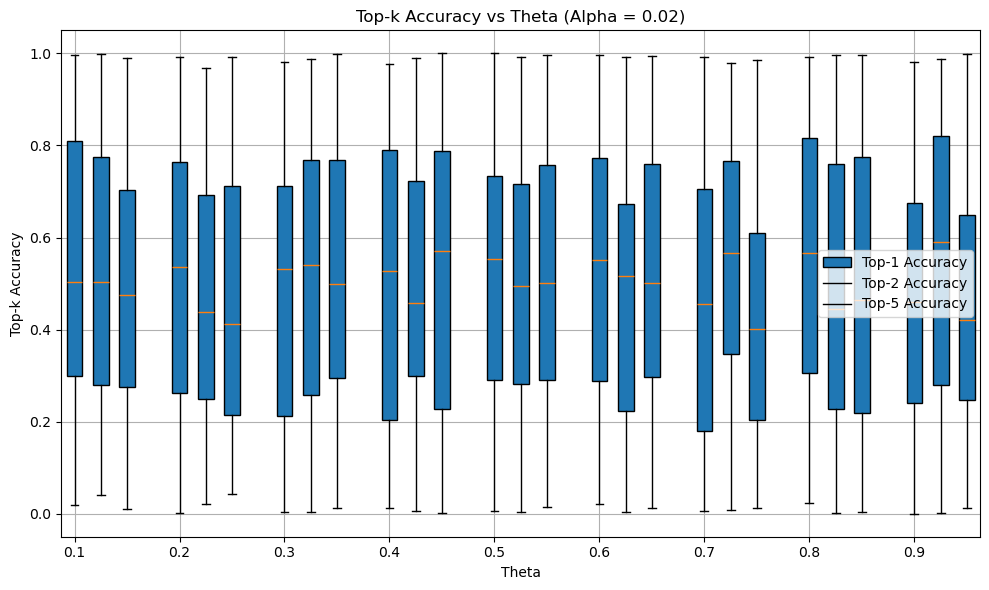

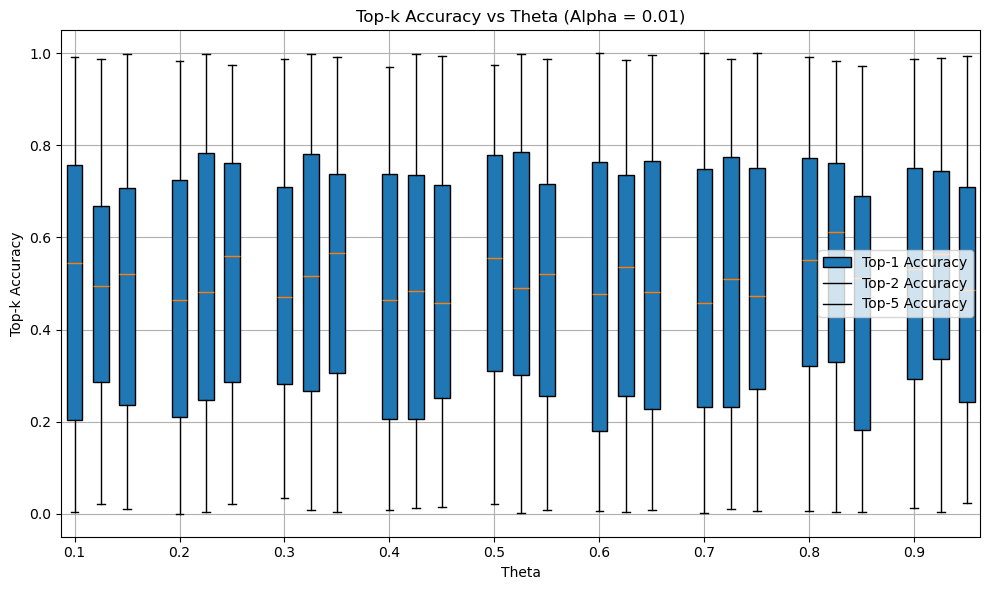

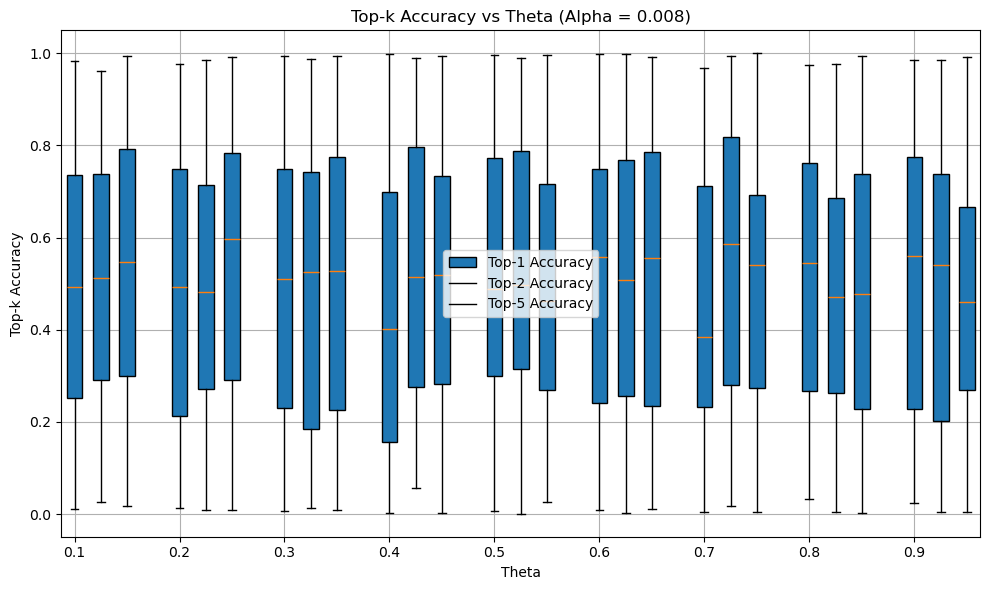

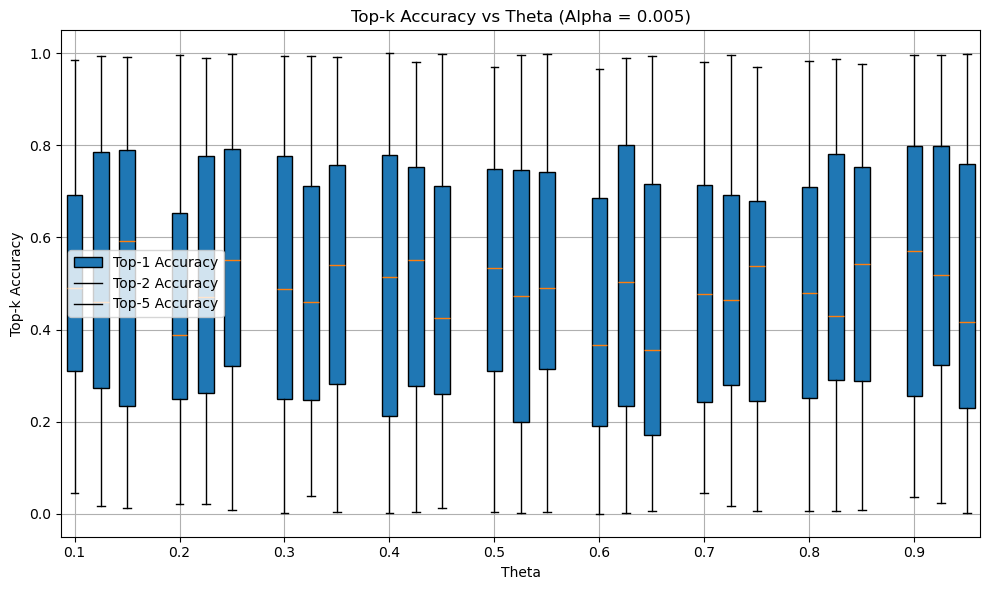

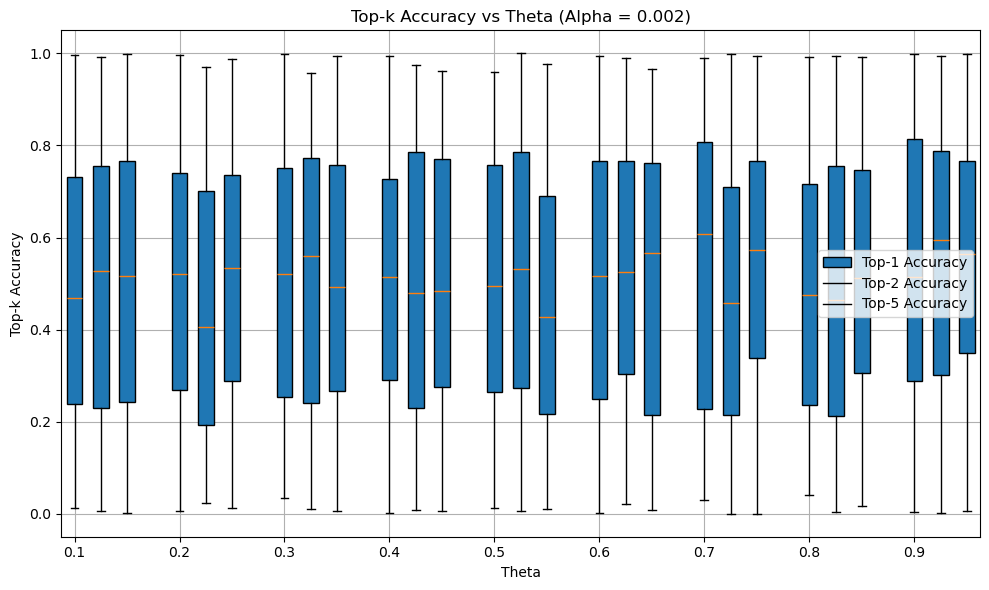

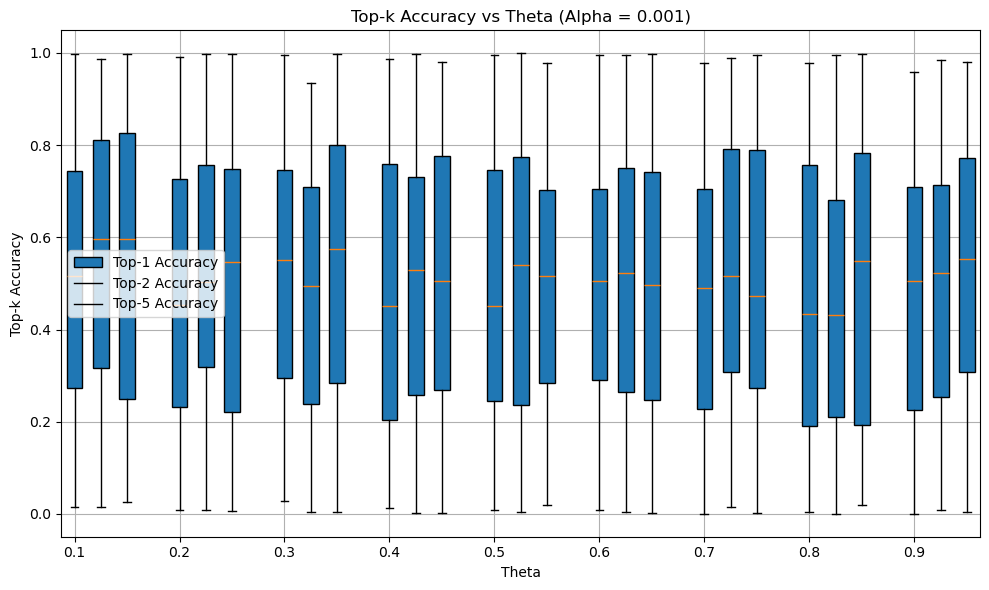

In [30]:
plot_boxplots(thetas, alphas, theta_ave_accuracies)

In [ ]:
for i in range(R):
    generate ar1 data
    for theta in thetas:
        for alpha in alphas:
            do ucb